In [1]:
import os
os.chdir("../")

In [2]:
import torch

from torch.utils.data import TensorDataset, DataLoader

from hebe.nn_models.feed_forward_nn import Classifier
from hebe.moons_utils import (
    extend_moons_training_data, 
    plot_moons_uncertainty_grid,
    create_moons_data,
    simulate_grid
)
from hebe.config import Config

## Create the Data

In [3]:
X_train, Y_train, X_test, Y_test = create_moons_data()

train_dataset = TensorDataset(X_train, Y_train)
batch_size = 1
train_dataloader = DataLoader(train_dataset, batch_size=batch_size)

## Initialize and Train the Model

In [4]:
config = Config()
model = Classifier(
    config.nn_parameters,
    config.active_learning
)

model.train(train_dataloader)

First loss: 0.6883231204748154
Last loss: 0.10736130510414568


## Plot Predictions Using Uncertainty Representation

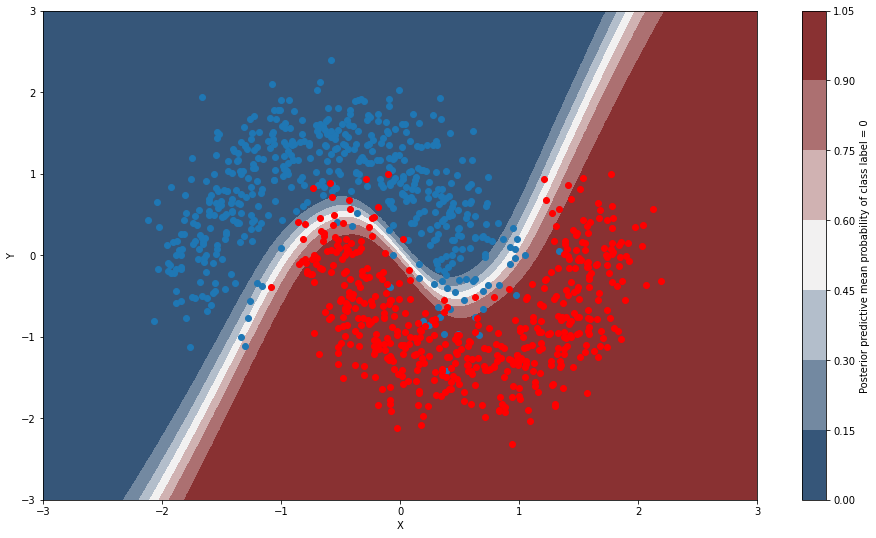

In [5]:
grid, nn_input_grid = simulate_grid()
first_round_of_predictions = model.predict(nn_input_grid)
plot_moons_uncertainty_grid(first_round_of_predictions, grid, X_train, Y_train, X_test, Y_test)

## Another Round of Predictions

In [ ]:
samped_indices = model.sample_indices_from_unlabeled_data(X_test)

(
    X_train, Y_train, X_test, Y_test
) = extend_moons_training_data(
    X_train, Y_train, X_test, Y_test, samped_indices
)

# Reinitialize the model
model.reset_cold_start()

# Retreain 
train_dataset = TensorDataset(X_train, Y_train)
batch_size = 1
train_dataloader = DataLoader(train_dataset, batch_size=batch_size)
model.train(train_dataloader)

# Plot
second_roud_of_predictions = model.predict(nn_input_grid)
plot_moons_uncertainty_grid(second_roud_of_predictions, grid, X_train, Y_train, X_test, Y_test)